# Community Detection

---

In [1]:
import sys

sys.path.insert(0, "../")

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import networkx as nx
from matplotlib.colors import to_hex
from networkx.algorithms import community

---

## Get adjacency matrix

In [2]:
# Get the adjacency matrix from the data
adjacency_matrix = pd.read_csv("../../dataset/adjacency_matrix.csv").values

# Remove the last column of the adjacency matrix
adjacency_matrix = adjacency_matrix[:, :-1]

---

## Identify communities

#### **Approach 1**: Hierarchical clustering

Co-occurrence Matrix (Disease-Disease):
[[6 0 0 ... 0 0 2]
 [0 4 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 4 0 0]
 [0 0 0 ... 0 7 0]
 [2 0 0 ... 0 0 11]]


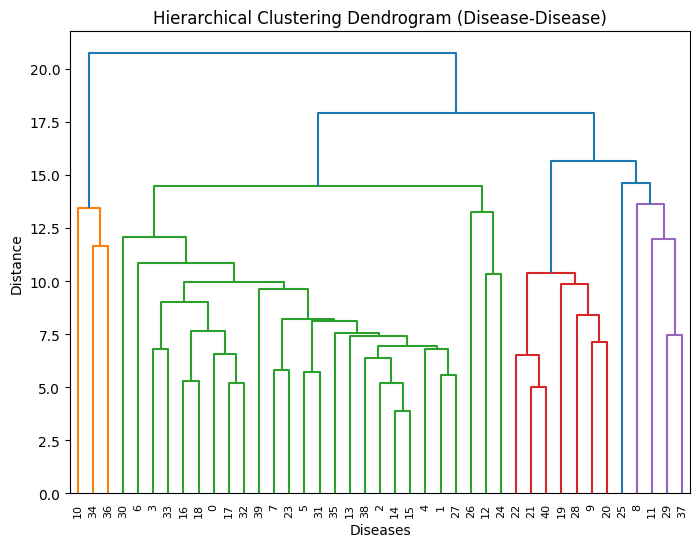

Cluster labels (Disease-Disease):
[2 2 2 2 2 2 2 2 4 3 1 4 2 2 2 2 2 2 2 3 3 3 3 2 2 4 2 2 3 4 2 2 2 2 1 2 1
 4 2 2 3]
Co-occurrence Matrix (Symptom-Symptom):
[[9 0 0 ... 1 5 7]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [1 0 0 ... 1 1 1]
 [5 0 0 ... 1 7 6]
 [7 0 0 ... 1 6 8]]


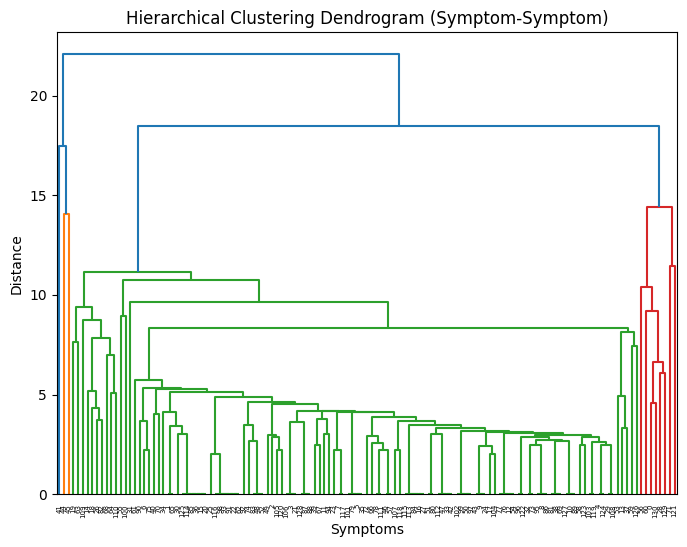

Cluster labels (Symptom-Symptom):
[4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3
 3 3 3 3 2 3 3 1 1 3 3 3 3 3 3 3 3 3 3 4 3 3 3 4 3 3 3 3 3 3 3 3 3 3 4 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 4 4]


In [3]:
# ----------------------------- DISEASES -----------------------------

# Compute co-occurrence matrix disease-disease
co_occurrence_matrix_d = np.matmul(adjacency_matrix, adjacency_matrix.T)

# Display the co-occurrence matrix
print("Co-occurrence Matrix (Disease-Disease):")
print(co_occurrence_matrix_d)

# Create a weighted graph directly
G_d = nx.Graph()

# Add nodes to the graph
num_nodes = co_occurrence_matrix_d.shape[0]
G_d.add_nodes_from(range(num_nodes))

# Add weighted edges to the graph
for i in range(num_nodes):
    for j in range(i+1, num_nodes):
        weight = co_occurrence_matrix_d[i, j]
        if weight != 0:
            G_d.add_edge(i, j, weight=weight)

# Perform hierarchical clustering
linkage_matrix = linkage(co_occurrence_matrix_d, method='average', metric='euclidean')

# Display the dendrogram
plt.figure(figsize=(8, 6))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram (Disease-Disease)")
plt.xlabel("Diseases")
plt.ylabel("Distance")
plt.show()

distance_threshold = 4
cluster_labels = fcluster(linkage_matrix, t=distance_threshold, criterion='maxclust')
print("Cluster labels (Disease-Disease):")
print(cluster_labels)


# ----------------------------- SYMPTOMS -----------------------------


# Compute co-occurrence matrix symptoms-symptoms
co_occurrence_matrix_s = np.matmul(adjacency_matrix.T, adjacency_matrix)

# Display the co-occurrence matrix
print("Co-occurrence Matrix (Symptom-Symptom):")
print(co_occurrence_matrix_s)

# Create a weighted graph directly
G_s = nx.Graph()
# Add nodes to the graph
num_nodes = co_occurrence_matrix_s.shape[0]
G_s.add_nodes_from(range(num_nodes))

# Add weighted edges to the graph
for i in range(num_nodes):
    for j in range(i+1, num_nodes):
        weight = co_occurrence_matrix_s[i, j]
        if weight != 0:
            G_s.add_edge(i, j, weight=weight)

# Perform hierarchical clustering
linkage_matrix = linkage(co_occurrence_matrix_s, method='average', metric='euclidean')

# Display the dendrogram
plt.figure(figsize=(8, 6))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram (Symptom-Symptom)")
plt.xlabel("Symptoms")
plt.ylabel("Distance")
plt.show()

distance_threshold = 4
cluster_labels = fcluster(linkage_matrix, t=distance_threshold, criterion='maxclust')
print("Cluster labels (Symptom-Symptom):")
print(cluster_labels)


#### **Approach 2**: Greedy modularity maximization

Communities: [frozenset({0, 3, 4, 9, 10, 13, 16, 17, 18, 21, 23, 25, 29, 30, 32, 33, 34, 36, 37, 40}), frozenset({1, 2, 35, 5, 38, 7, 8, 11, 14, 15, 27, 31}), frozenset({6, 39, 12, 19, 20, 22, 24, 26, 28})]
Modularity: 0.08420739534738093


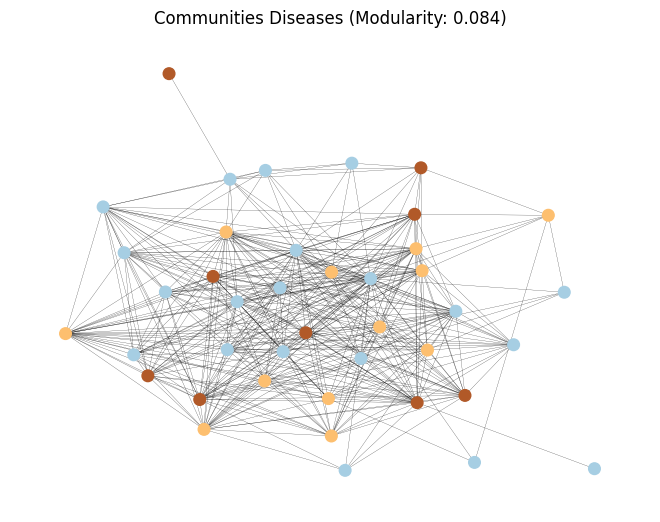

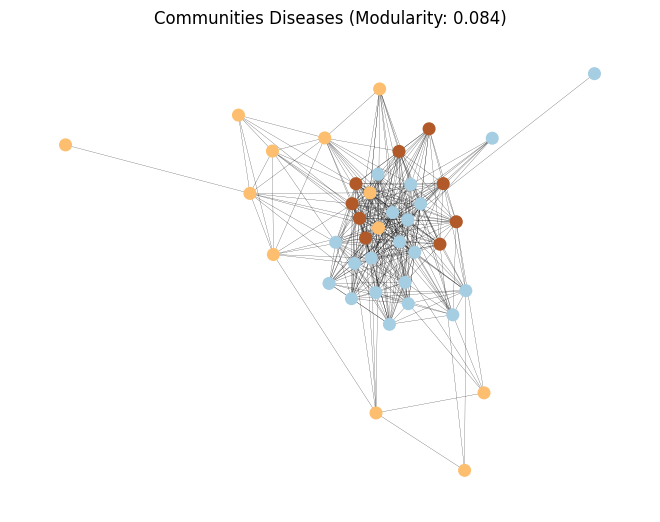

Communities: [frozenset({128, 0, 129, 130, 3, 4, 6, 7, 10, 11, 14, 19, 21, 23, 28, 29, 31, 32, 33, 39, 42, 44, 45, 47, 51, 55, 56, 60, 61, 63, 64, 67, 68, 71, 73, 75, 80, 87, 88, 89, 90, 100, 103, 106, 108, 110, 112, 117, 119, 121, 124, 127}), frozenset({1, 2, 5, 13, 15, 20, 30, 34, 35, 36, 37, 40, 41, 46, 48, 49, 52, 53, 57, 59, 65, 66, 70, 72, 74, 78, 79, 83, 85, 92, 101, 105, 109, 111, 114, 120, 123, 125, 126}), frozenset({9, 17, 82, 18, 22, 24, 25, 26, 91, 93, 94, 96, 98, 122, 104, 43, 107, 116, 118, 58, 62}), frozenset({16, 113, 115, 84, 27}), frozenset({12, 77, 54, 76}), frozenset({97, 50, 99, 102}), frozenset({81, 69, 38}), frozenset({8, 86, 95})]
Modularity: 0.2791189578538087


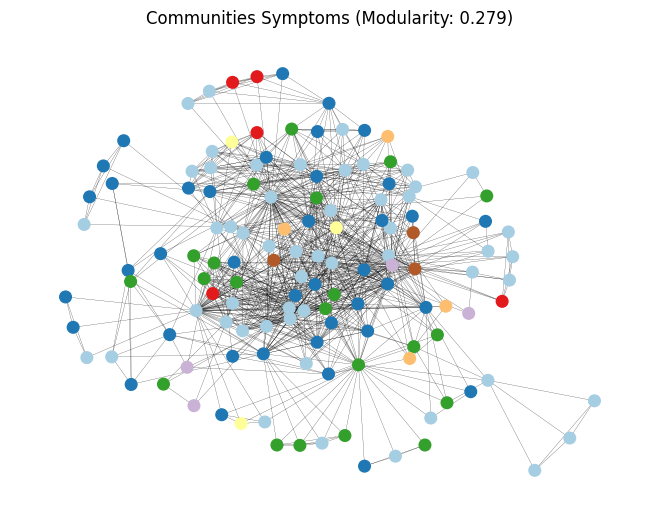

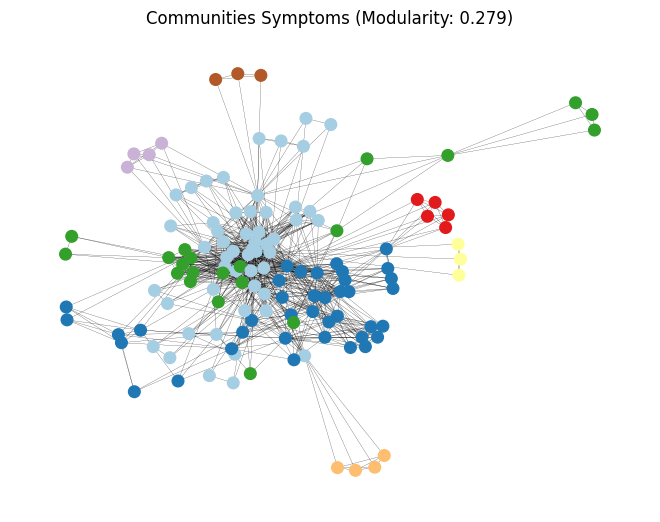

In [4]:
# --------------------------- DISEASES -----------------------------

# Compute modularity using networkx
communities = list(nx.community.greedy_modularity_communities(G_d))
print("Communities:", communities)
modularity = nx.community.modularity(G_d, communities)
print("Modularity:", modularity)

# Create a color map for nodes based on community
color_map = {}
for i, community in enumerate(communities):
    color_map.update({node: i for node in community})

# Draw the graph with node coloration keeping kamada_kawai_layout to compare it with the original one with no clusters
pos = nx.kamada_kawai_layout(G_d)  # You can choose other layout algorithms
nx.draw(
        G_d, 
        pos, 
        node_color=list(color_map.values()),
        with_labels=False, 
        cmap=plt.cm.Paired,
        node_size=70,
        width=0.15,
        )
        
plt.title("Communities Diseases (Modularity: {:.3f})".format(modularity))
plt.show()


# Plot another version of the graph with communities grouped together
pos = nx.spring_layout(G_d)  # You can use a different layout if needed

# Draw nodes and edges
nx.draw(
    G_d, 
    pos, 
    node_color=[color_map[node] for node in G_d.nodes()], 
    with_labels=False, 
    cmap='Paired', 
    node_size=70,
    width=0.15,
    )

# Add labels and title
plt.title("Communities Diseases (Modularity: {:.3f})".format(modularity))
plt.show()


# ----------------------------- SYMPTOMS -----------------------------


# Compute modularity using networkx
communities = list(nx.community.greedy_modularity_communities(G_s))
communities_comparison = communities
print("Communities:", communities)
modularity = nx.community.modularity(G_s, communities)
print("Modularity:", modularity)

# Create a color map for nodes based on community
color_map = {}
for i, community in enumerate(communities):
    color_map.update({node: i for node in community})
    

# Draw the graph with node coloration keeping kamada_kawai_layout to compare it with the original one with no clusters
pos = nx.kamada_kawai_layout(G_s)  # You can choose other layout algorithms
nx.draw(
    G_s, pos, 
    node_color=list(color_map.values()), 
    with_labels=False, 
    cmap=plt.cm.Paired,
    node_size=70,
    width=0.15,
    )

plt.title("Communities Symptoms (Modularity: {:.3f})".format(modularity))
plt.show()


# Plot another version of the graph with communities grouped together
pos = nx.spring_layout(G_s)  # You can use a different layout if needed

# Draw nodes and edges
nx.draw(
    G_s, 
    pos, 
    node_color=[color_map[node] for node in G_s.nodes()], 
    with_labels=False, 
    cmap='Paired', 
    node_size=70,
    width=0.15,
    )

# Add labels and title
plt.title("Communities Symptoms (Modularity: {:.3f})".format(modularity))
plt.show()

#### **Approach 3**: Girvan-Newman algorithm

In [5]:
# function to plot graph with node colouring based on communities
def visualize_communities(graph, communities, i):
    node_colors = create_community_node_colors(graph, communities)
    modularity = round(nx.community.modularity(graph, communities), 6)
    title = f"Community Visualization of {len(communities)} communities with modularity of {modularity}"
    pos = nx.spring_layout(graph, k=0.3, iterations=50, seed=2)
    plt.subplot(3, 1, i)
    plt.title(title)
    nx.draw(
        graph,
        pos=pos,
        node_size=70,
        node_color=node_colors,
        with_labels=False,
        font_size=20,
        font_color="black",
        width=0.15,
    )


# function to create node colour list
def create_community_node_colors(graph, communities):
    number_of_colors = len(graph.nodes)
    cmap = plt.get_cmap('Paired') 
    colors = [cmap(i) for i in np.linspace(0, 1, number_of_colors)]
    node_colors = []
    for node in graph:
        current_community_index = 0
        for community in communities:
            if node in community:
                node_colors.append(colors[current_community_index])
                break
            current_community_index += 1
    return node_colors

Co-occurrence Matrix (Disease-Disease):
[[6 0 0 ... 0 0 2]
 [0 4 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 4 0 0]
 [0 0 0 ... 0 7 0]
 [2 0 0 ... 0 0 11]]


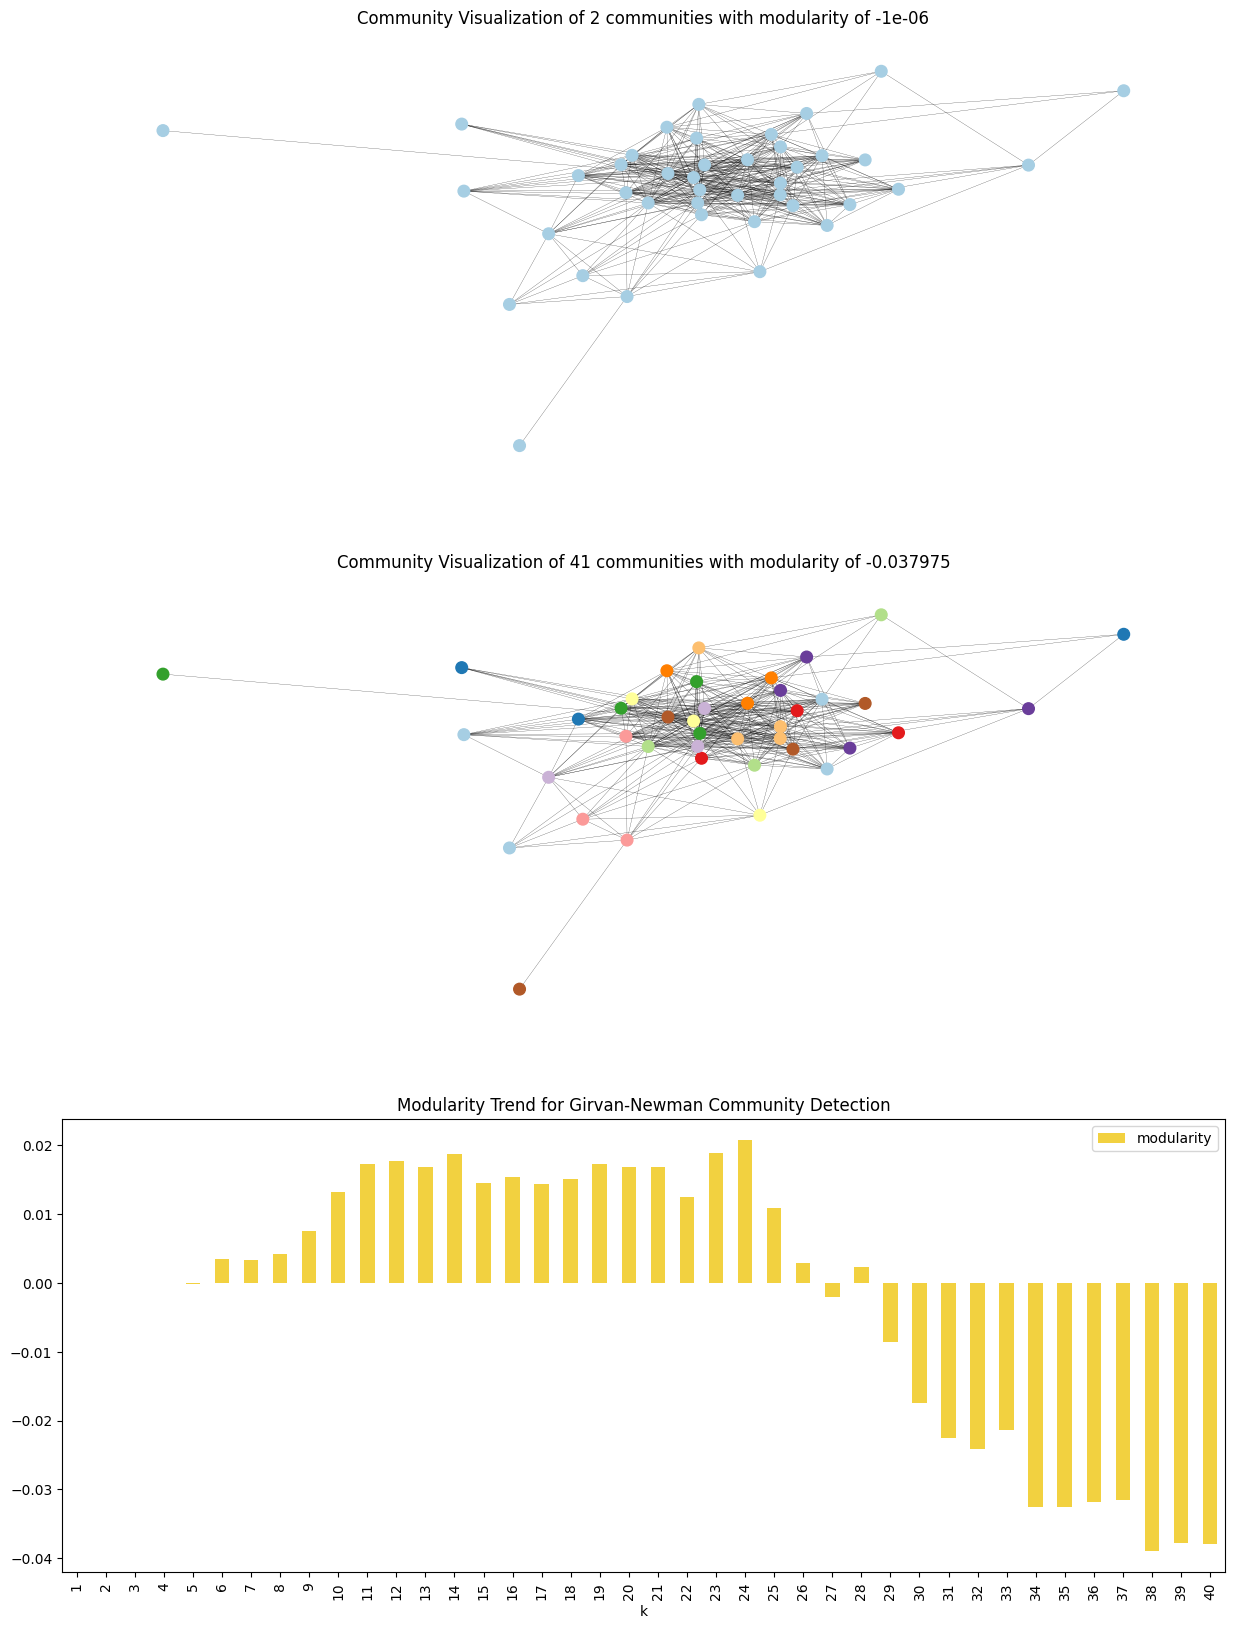

In [6]:
# ----------------------------- DISEASES -----------------------------

# Compute co-occurrence matrix disease-disease
co_occurrence_matrix_d = np.matmul(adjacency_matrix, adjacency_matrix.T)

# Display the co-occurrence matrix
print("Co-occurrence Matrix (Disease-Disease):")
print(co_occurrence_matrix_d)

# Create a weighted graph directly
G = nx.Graph()

# Add nodes to the graph
num_nodes = co_occurrence_matrix_d.shape[0]
G.add_nodes_from(range(num_nodes))

# Add weighted edges to the graph
for i in range(num_nodes):
    for j in range(i+1, num_nodes):
        weight = co_occurrence_matrix_d[i, j]
        if weight != 0:
            G.add_edge(i, j, weight=weight)

communities = list(nx.community.girvan_newman(G))

# Modularity -> measures the strength of division of a network into modules
modularity_df = pd.DataFrame(
    [
        [k + 1, nx.community.modularity(G, communities[k])]
        for k in range(len(communities))
    ],
    columns=["k", "modularity"],
)


fig, ax = plt.subplots(3, figsize=(15, 20))

# Plot graph with colouring based on communities
visualize_communities(G, communities[0], 1)
visualize_communities(G, communities[39], 2)

# Plot change in modularity as the important edges are removed
modularity_df.plot.bar(
    x="k",
    ax=ax[2],
    color="#F2D140",
    title="Modularity Trend for Girvan-Newman Community Detection",
)
plt.show()


Co-occurrence Matrix (Symptom-Symptom):
[[9 0 0 ... 1 5 7]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [1 0 0 ... 1 1 1]
 [5 0 0 ... 1 7 6]
 [7 0 0 ... 1 6 8]]


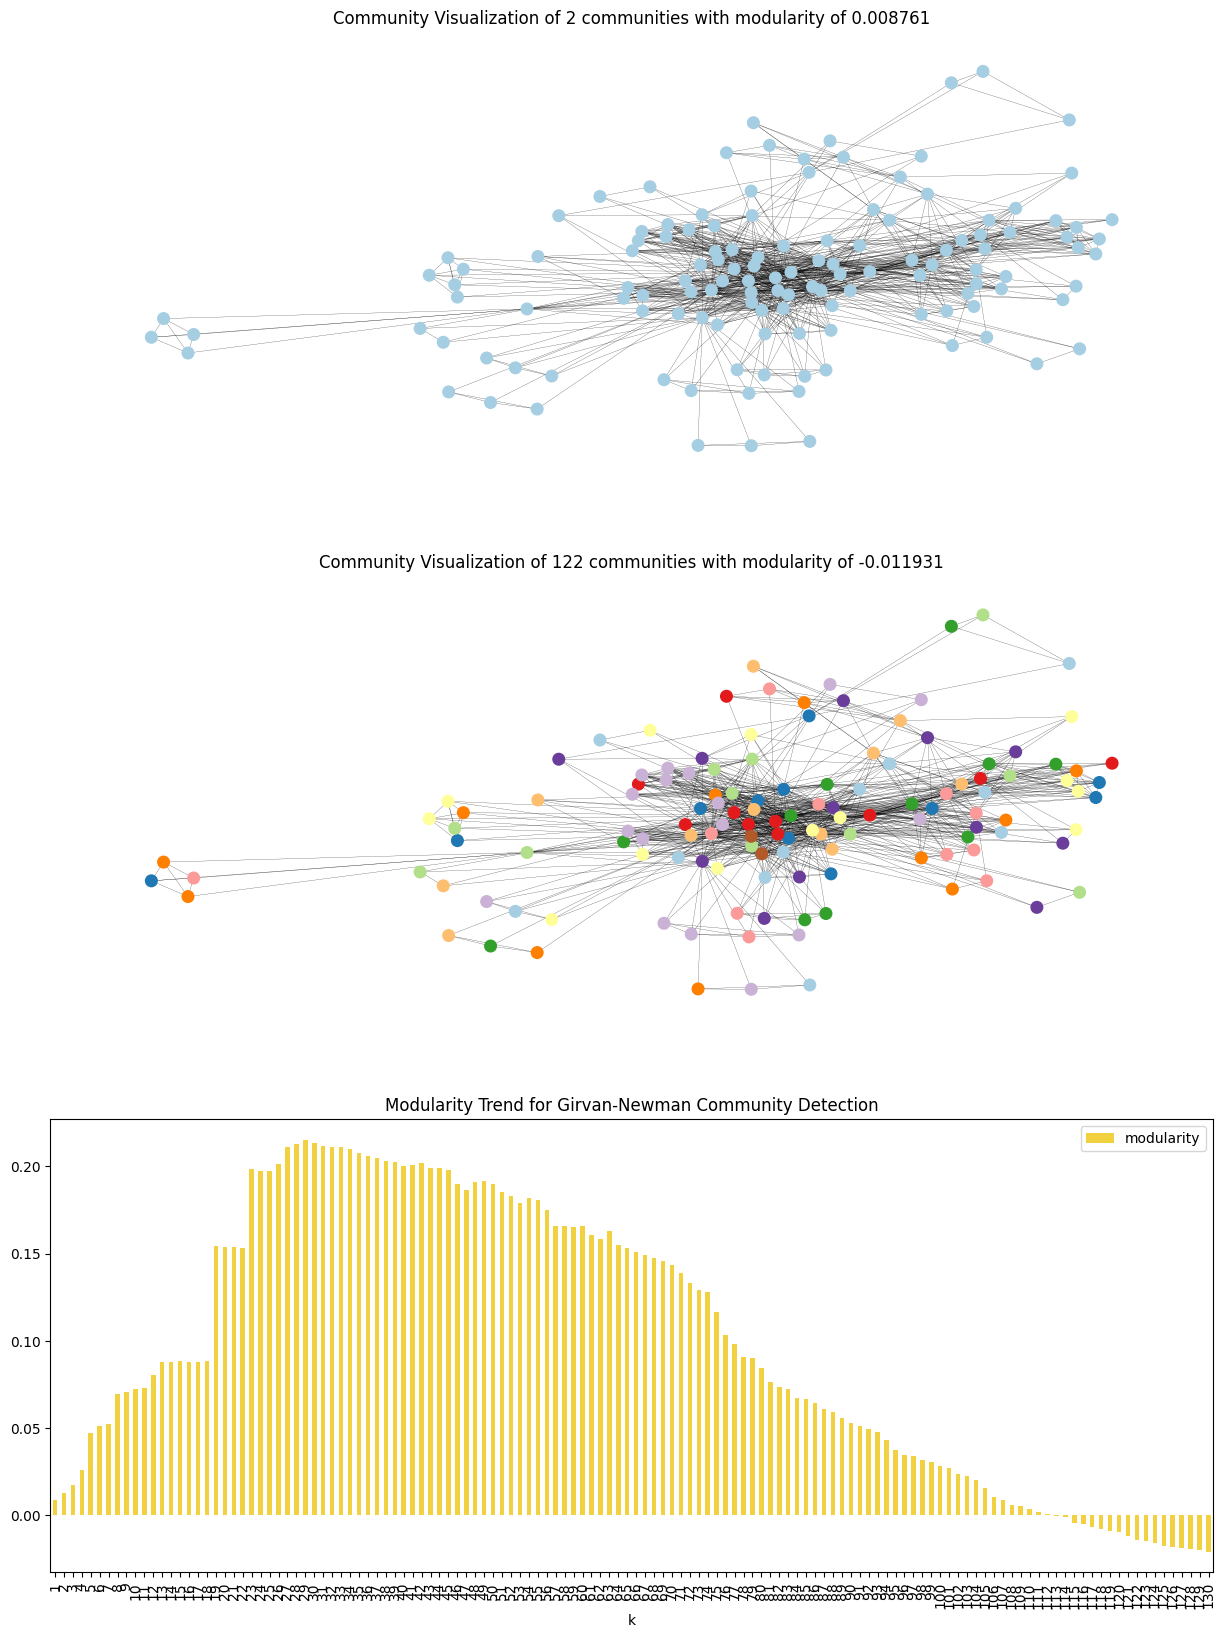

In [7]:
# ----------------------------- SYMPTOMS -----------------------------

# Compute co-occurrence matrix disease-disease
co_occurrence_matrix_s = np.matmul(adjacency_matrix.T, adjacency_matrix)

# Display the co-occurrence matrix
print("Co-occurrence Matrix (Symptom-Symptom):")
print(co_occurrence_matrix_s)

# Create a weighted graph directly
G = nx.Graph()

# Add nodes to the graph
num_nodes = co_occurrence_matrix_s.shape[0]
G.add_nodes_from(range(num_nodes))

# Add weighted edges to the graph
for i in range(num_nodes):
    for j in range(i+1, num_nodes):
        weight = co_occurrence_matrix_s[i, j]
        if weight != 0:
            G.add_edge(i, j, weight=weight)

communities = list(nx.community.girvan_newman(G))

# Modularity -> measures the strength of division of a network into modules
modularity_df = pd.DataFrame(
    [
        [k + 1, nx.community.modularity(G, communities[k])]
        for k in range(len(communities))
    ],
    columns=["k", "modularity"],
)


fig, ax = plt.subplots(3, figsize=(15, 20))

# Plot graph with colouring based on communities
visualize_communities(G, communities[0], 1)
visualize_communities(G, communities[120], 2)

# Plot change in modularity as the important edges are removed
modularity_df.plot.bar(
    x="k",
    ax=ax[2],
    color="#F2D140",
    title="Modularity Trend for Girvan-Newman Community Detection",
)
plt.show()

---

## Community Features Extraction

**Girvan-Newman** --> list of tuples of sets. Each set represents a community. Each tuple a level in the dendrogram.

**Greedy Modularity** --> list of frozensets. Each set represents a community.

#### **Community Membership**: A binary indicator for whether a symptom or disease belongs to a particular community.

In [22]:
def get_community_onehot_from_symptoms(symptoms_onehot, communities):
    """
    This function takes as input a one hot vector with the symptoms and returns the number of symptoms for each community.

    Parameters:
    - symptoms_onehot (numpy.ndarray): One-hot encoded vector representing the presence of symptoms.
    - communities (list of lists): List of communities, where each community is represented as a list of indices.

    Returns:
    - numpy.ndarray: Vector representing the count of symptoms for each community.
    """

    # Initialize a vector to represent the communities
    comm_vector = np.zeros(len(communities))
    
    # Find the positions of ones in the symptoms_onehot vector
    symptom_pos = [i for i, val in enumerate(symptoms_onehot[0]) if val == 1]
    
    # Iterate over the positions of ones in the symptoms_onehot vector
    for i in symptom_pos:
        # Iterate over the communities
        for j, community in enumerate(communities):
            # Check if the position is in the current community
            if i in community:
                # Increment the corresponding element in the comm_vector
                comm_vector[j] += 1
    
    # Return the resulting community vector
    return comm_vector

(41, 131)

[0 1 0 0 1 0 0 0 1 0]


[1, 4, 8]